# This Notebook tries to find patterns in the scores for different packages (Lethola / Psi4 / PySCF)

First we take a look at the data at hand. 

In [237]:
import pandas as pd
from openbabel import pybel
import numpy as np
from utils import *

In [238]:
psi4_data = pd.read_csv("../data/psi4_first_run.csv")
pyscf_data = pd.read_csv("../data/pyscf_first_run.csv")
lethola_data = pd.read_csv("../data/lethola_all.csv")

lethola_data.head()


,molecule,gwh,core,sad,sadno,huckel,gsz,lda-x,cap-x,cha-x,table_id,type_name,method,base,benchmark_metric
0,ch,0.501,0.557,0.739,0.877,0.937,0.862,0.851,0.868,0.843,6,Non-neutral and/or non-singlet molecules,HF,pcseg-0,f-score
1,cch,0.504,0.693,0.833,0.962,0.945,0.931,0.966,0.965,0.966,6,Non-neutral and/or non-singlet molecules,HF,pcseg-0,f-score
2,ch2ch,0.493,0.603,0.856,0.960,0.960,0.934,0.968,0.968,0.969,6,Non-neutral and/or non-singlet molecules,HF,pcseg-0,f-score
3,Ti(BH4)3,0.608,0.614,0.897,0.972,0.924,0.809,0.959,0.963,0.967,6,Non-neutral and/or non-singlet molecules,HF,pcseg-0,f-score
4,cyclopropyl,0.515,0.576,0.880,0.970,0.973,0.929,0.968,0.967,0.970,6,Non-neutral and/or non-singlet molecules,HF,pcseg-0,f-score


In [239]:
# preproc - we add iupac names to the data! 
file_paths = get_xyz_file_paths("../data/geometries")
unique_mols = psi4_data["molecule"].unique()

assert [m==n for m,n in zip(unique_mols, lethola_data["molecule"].unique())] # check for my sanity

def convert_to_iupac(name, output_format): 
    filepath = [x for x in file_paths if f"/{name}.xyz" in x]
    assert len(filepath) == 1
    filepath = filepath[0]
    try: 
        mol = pybel.readstring("xyz", open(filepath).read())
    except FileNotFoundError: 
        print(f"Could not find {name}.xyz")
        return None
    return mol.write(output_format) if mol else None


unique_mols_inchi = {x: convert_to_iupac(x, "inchi") for x in unique_mols}
unique_mols_smi = {x: convert_to_iupac(x, "smi") for x in unique_mols}

psi4_data["inchi"] = psi4_data["molecule"].map(unique_mols_inchi)
psi4_data["smi"] = psi4_data["molecule"].map(unique_mols_smi)

lethola_data["inchi"] = lethola_data["molecule"].map(unique_mols_inchi)
lethola_data["smi"] = lethola_data["molecule"].map(unique_mols_smi)

pyscf_data["inchi"] = pyscf_data["molecule"].map(unique_mols_inchi)
pyscf_data["smi"] = pyscf_data["molecule"].map(unique_mols_smi)

*** Open Babel Warning  in InChI code
  molecule "ch" dataset "non-multireference W4-17" charge 0 multiplicity 2 :Accepted unusual valence(s): C(1)
*** Open Babel Warning  in InChI code
  molecule "cch" dataset "non-multireference W4-17" charge 0 multiplicity 2 :Accepted unusual valence(s): C(3)
*** Open Babel Warning  in InChI code
  molecule "ch2ch" dataset "non-multireference W4-17" charge 0 multiplicity 2 :Accepted unusual valence(s): C(3)
*** Open Babel Warning  in InChI code
  molecule "Ti(BH4)3" dataset "Bühl 2006" charge 0 multiplicity 2 :Accepted unusual valence(s): B(4)
*** Open Babel Warning  in InChI code
  molecule "cyclopropyl" dataset "non-multireference W4-17" charge 0 multiplicity 2 :Accepted unusual valence(s): C(3)
*** Open Babel Warning  in InChI code
  molecule "cn" dataset "non-multireference W4-17" charge 0 multiplicity 2 :Accepted unusual valence(s): C(3)
*** Open Babel Warning  in InChI code
  molecule "allyl" dataset "non-multireference W4-17" charge 0 multipl

In [240]:
# add categories to data
lethola_data['type_name'].unique()

lethola_data["organic"] = lethola_data["inchi"].map(categorize_organic)
psi4_data["organic"] = psi4_data["inchi"].map(categorize_organic)
pyscf_data["organic"] = pyscf_data["inchi"].map(categorize_organic)

lethola_data["functional_group"] = lethola_data["smi"].map(categorize_functional_group)
psi4_data["functional_group"] = psi4_data["smi"].map(categorize_functional_group)
pyscf_data["functional_group"] = pyscf_data["smi"].map(categorize_functional_group)

lethola_data.to_csv("../data/categorized_mols/lethola_all.csv", index=False)
psi4_data.to_csv("../data/categorized_mols/psi4_first_run.csv", index=False)
pyscf_data.to_csv("../data/categorized_mols/pyscf_first_run.csv", index=False)

lethola_data["functional_group"].value_counts()


*** Open Babel Warning  in InChI code
  For InChI=1S/HNO2/c2-1-3/h2H
  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Falsely present, Attachment points)
*** Open Babel Warning  in InChI code
  For InChI=1S/HNO2/c2-1-3/h2H
  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Falsely present, Attachment points)
*** Open Babel Warning  in InChI code
  For InChI=1S/HNO2/c2-1-3/h2H
  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Falsely present, Attachment points)
*** Open Babel Warning  in InChI code
  For InChI=1S/HNO2/c2-1-3/h2H
  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Falsely present, Attachment points)
*** Open Babel Warning  in InChI code
  For InChI=1S/HNO2/c2-1-3/h2H
  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Falsely present, Attachment points)
*** Open Babel Warning  in InChI code
  For InChI=1S/HNO2/c2-1-3/

functional_group
Unknown                             1448
Alkene                               288
Amine                                 80
Alkyne                                56
Nitrile                               48
Alcohol                               40
Ketone                                24
Ether                                 24
Aldehyde, Ketone                      16
Ester, Ether                          16
Alcohol, Carboxylic Acid, Ketone       8
Ether, Alkene                          8
Alcohol, Carboxylic Acid               8
Alcohol, Nitrile                       8
Name: count, dtype: int64

## Analysis
Now we have classified our data a bit - let's try and see if there are patterns for the different categories

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns


In [242]:
# plotting funcs
def plot_stacked_scatter(data, guess_methods, title):
    fig, axes = plt.subplots(len(guess_methods), 1, figsize=(10, 2 * len(guess_methods)), sharex=True)
    
    for i, guess_method in enumerate(guess_methods):
        organic_data = data[data['organic'] == 'organic']
        inorganic_data = data[data['organic'] == 'inorganic']
        
        sns.scatterplot(x=guess_method, y=[0]*len(organic_data), data=organic_data, ax=axes[i], label=f'{guess_method} (organic)', color='green', alpha=0.6)
        sns.scatterplot(x=guess_method, y=[0]*len(inorganic_data), data=inorganic_data, ax=axes[i], label=f'{guess_method} (inorganic)', color='orange', alpha=0.6)
        
        axes[i].set_yticks([])
        axes[i].set_ylabel('')
        axes[i].legend()
        axes[i].set_title(f'{title} - {guess_method}')
    
    axes[-1].set_xlabel('Value')
    plt.tight_layout()
    plt.savefig(f'plots/{title}_scatter.png')
    plt.show()

# def plot_stacked_density(data, guess_methods, title, return_metrics=True):
#     fig, axes = plt.subplots(len(guess_methods), 1, figsize=(10, 2 * len(guess_methods)), sharex=True)

#     metrics = {guess_methods[i]: {} for i in range(len(guess_methods))}
#     for i, guess_method in enumerate(guess_methods):
#         organic_data = data[data['organic'] == 'organic']
#         inorganic_data = data[data['organic'] == 'inorganic']
        
#         org_mean = organic_data[guess_method].mean()
#         inorg_mean = inorganic_data[guess_method].mean()
#         org_std = organic_data[guess_method].std()
#         inorg_std = inorganic_data[guess_method].std()
        
#         metrics[guess_method] = {
#             'organic': {
#                 'mean': org_mean,
#                 'std': org_std
#             },
#             'inorganic': {
#                 'mean': inorg_mean,
#                 'std': inorg_std
#             }
#         }
        
#         sns.kdeplot(organic_data[guess_method], ax=axes[i], label=f'{guess_method} (organic)', color='green', fill=True, alpha=0.6)
#         sns.kdeplot(inorganic_data[guess_method], ax=axes[i], label=f'{guess_method} (inorganic)', color='orange', fill=True, alpha=0.6)

#         axes[i].axvline(org_mean, color='darkgreen', linestyle='--', label=f'organic mean: {org_mean:.2f}')
#         axes[i].axvline(inorg_mean, color='darkorange', linestyle='--', label=f'inorganic mean: {inorg_mean:.2f}')

#         axes[i].text(1.05*org_mean, axes[i].get_ylim()[1] * 0.9, f'{org_mean:.3f}', color='darkgreen')
#         axes[i].text(1.05*org_mean, axes[i].get_ylim()[1] * 0.8, f'Std: {org_std:.3f}', color='darkgreen')
#         axes[i].text(1.05*inorg_mean, axes[i].get_ylim()[1] * 0.7, f'{inorg_mean:.3f}', color='darkorange')
#         axes[i].text(1.05*inorg_mean, axes[i].get_ylim()[1] * 0.6, f'Std: {inorg_std:.3f}', color='darkorange')
        
#         axes[i].set_yticks([])
#         axes[i].set_ylabel('')
#         axes[i].legend()
#         axes[i].set_title(f'{title} - {guess_method}')

#     axes[-1].set_xlabel('Value')
#     plt.tight_layout()
#     plt.savefig(f'plots/{title}_density.png')
#     plt.show()
#     if return_metrics:
#         return metrics

def plot_stacked_density(data, guess_methods, category_col, title, category_filter = None, return_metrics=True):
    categories = data[category_col].unique()  # Dynamically detect categories
    if category_filter:
        categories = np.array(category_filter)
    colors = sns.color_palette(None, len(categories))  # Generate unique colors

    legend_height_est = 0.7 * len(categories)  # Estimate legend height based on number of categories
    fig, axes = plt.subplots(len(guess_methods), 1, figsize=(10, len(guess_methods) * legend_height_est), sharex=True)

    if len(guess_methods) == 1:
        axes = [axes]  # Ensure axes is always iterable

    metrics = {method: {} for method in guess_methods}

    for i, method in enumerate(guess_methods):
        for category, color in zip(categories, colors):
            category_data = data[data[category_col] == category][method]
            
            mean_value = category_data.mean()
            std_value = category_data.std()
            
            # Store metrics for return
            metrics[method][category] = {'mean': mean_value, 'std': std_value}
            
            # Density Plot
            sns.kdeplot(category_data, ax=axes[i], label=f"{method} ({category})", color=color, fill=True, alpha=0.3)
            
            # Mean Line
            axes[i].axvline(mean_value, color=color, linestyle='--', label=f"{category} mean: {mean_value:.2f}")
            
            # Display Text for Mean and Std
            if len(categories) <= 3: 
                y_lim = axes[i].get_ylim()[1]  # Upper y-limit
                axes[i].text(1.05 * mean_value, y_lim * (0.9 - categories.tolist().index(category) * 0.2),
                            f"{mean_value:.3f}\nStd: {std_value:.3f}", color=color)

        axes[i].set_yticks([])
        axes[i].set_ylabel('')
        axes[i].legend()
        axes[i].set_title(f"{title} - {method}")

    axes[-1].set_xlabel("Value")
    plt.tight_layout()
    plt.savefig(f'plots/{title}_density.png')
    plt.show()

    if return_metrics:
        return metrics


Ok let's look at Lethola's data first

In [243]:
guessing_methods_lethola = ["gwh", "core", "sad", "sadno", "huckel", "gsz", "lda-x", "cap-x", "cha-x"]
# plot_stacked_scatter(lethola_data, guessing_methods_lethola, "Lethola data (f-score)")
# metrics = plot_stacked_density(lethola_data, guessing_methods_lethola, "Lethola data (f-score)")

def get_max_metrics(data, guessing_methos, metric_name="Unknown_metric_name", dataset_name="Unknown_dataset_name"): 
    row_max = data[guessing_methos].max(axis=1)
    row_max_method_names = data[guessing_methos].idxmax(axis=1)

    row_max_mean = row_max.mean()
    row_max_std = row_max.std()

    row_max_method_counts = row_max_method_names.value_counts()
    row_max_method_ratios = row_max_method_counts / row_max_method_counts.sum()

    mean_per_method = data[guessing_methos].mean()
    std_per_method = data[guessing_methos].std()

    return {"max_metric_mean": row_max_mean, "max_metric_std": row_max_std, "max_metric_ratios": row_max_method_ratios, "mean_per_method": mean_per_method, "std_per_method": std_per_method, "metric_name": metric_name, "dataset_name": dataset_name}


# barplot
def plot_max_metric_ratios(metrics_dict, categories, title='Distribution of best guessing methods for different categories', filesuffix=''):
    filesuffix = "_"+filesuffix if len(filesuffix) > 0 and filesuffix[0] != "_" else filesuffix
    font_size = 12 if len(categories) <= 2 else 9
    fig, ax = plt.subplots(figsize=(12, 6))

    # Combine metrics for plotting
    combined_metrics = pd.DataFrame({
        category: 100 * metrics_dict[category]['max_metric_ratios'] for category in categories
    }).T

    # Plot the barplot
    combined_metrics.T.plot(kind='bar', ax=ax, width=0.8)

    # Adjust the x-axis labels to avoid overlap
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add mean and std text
    for i, category in enumerate(categories):
        ax.text(0.5, 0.95 - i*0.05, f"Best {category} Mean ({metrics_dict[category]['metric_name']}): {metrics_dict[category]['max_metric_mean']:.3f}, Std: {metrics_dict[category]['max_metric_std']:.3f}", 
            transform=ax.transAxes, ha='center', va='center', fontsize=font_size)

    # Add mean and std per method directly over each bar
    for i, method in enumerate(combined_metrics.columns):
        for j, category in enumerate(categories):
            mean = metrics_dict[category]['mean_per_method'][method]
            std = metrics_dict[category]['std_per_method'][method]
            # get x pos of each bar
            x_pos = ax.patches[i].get_x() + ax.patches[i].get_width() / 2
            x_width = ax.patches[i].get_width()
            ax.text(x_pos+x_width *j, combined_metrics.loc[category, method] + 0.1, f"{mean:.2f}\n±{std:.2f}", ha='center', va='bottom', fontsize=font_size-2)

    # Set labels and title
    ax.set_ylabel('Share of molecules (%)')
    ax.set_title(title + f" ({metrics_dict[category]['dataset_name']})")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'plots/{metrics_dict[category]['dataset_name']}_dist_best_guessing_method{filesuffix}.png')


    # Add smaller barplot for percentage distribution of categories
    fig2, ax2 = plt.subplots(figsize=(6, 3))
    category_counts = lethola_data['organic'].value_counts(normalize=True) * 100
    category_counts.plot(kind='bar', ax=ax2, color=['green', 'orange'])
    ax2.set_ylabel('Percentage of total entries (%)')
    ax2.set_title('Percentage distribution of categories')
    plt.tight_layout()
    plt.savefig(f'plots/{metrics_dict[category]['dataset_name']}_dist_categories{filesuffix}.png')
    plt.show()



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Mean of methods (organic):
gwh       0.599343
core      0.694305
sad       0.896414
sadno     0.971171
huckel    0.946783
gsz       0.948519
lda-x     0.981760
cap-x     0.981091
cha-x     0.982885
dtype: float64
Mean of methods (inorganic):
gwh       0.607685
core      0.660114
sad       0.894946
sadno     0.963471
huckel    0.938852
gsz       0.914589
lda-x     0.970787
cap-x     0.972135
cha-x     0.972773
dtype: float64
Note that ['lda-x', 'cha-x', 'huckel', 'sadno', 'gsz', 'cap-x'] for organic and ['lda-x', 'cap-x', 'sadno', 'cha-x', 'huckel', 'gsz', 'gwh'] for inorganic are methods which performed best on at least one molecule


posx and posy should be finite values


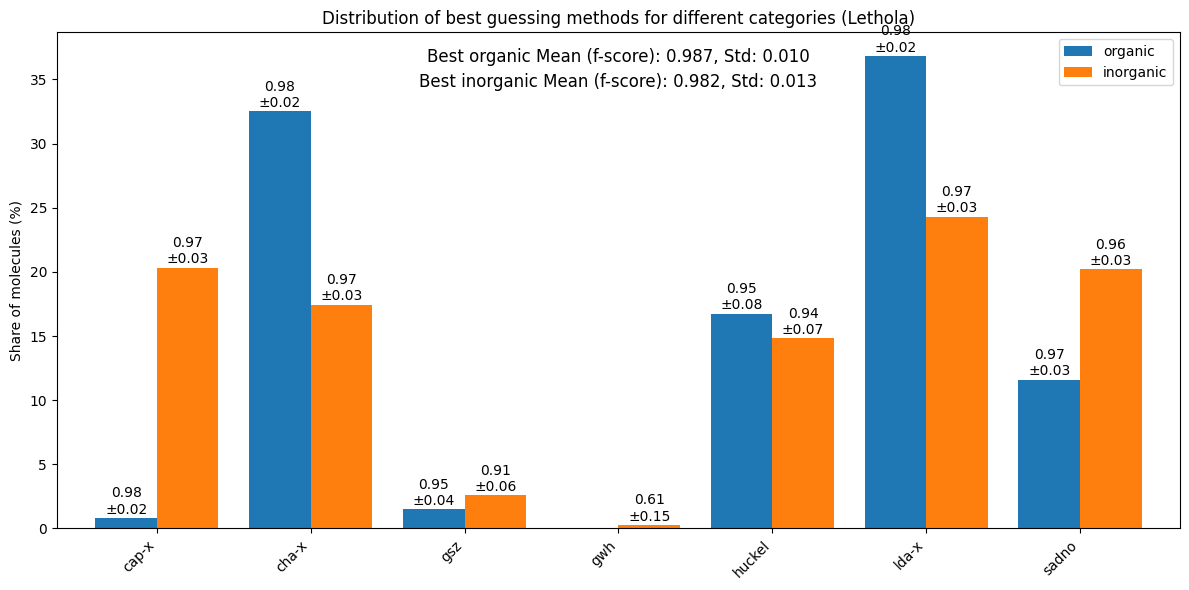

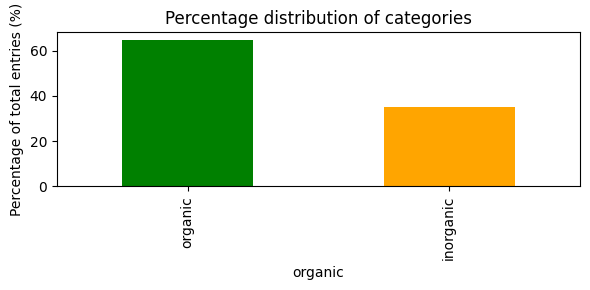

In [244]:
categories = ['organic', 'inorganic']
# split into organic and inorganic
organic_data = lethola_data[lethola_data['organic'] == 'organic']
inorganic_data = lethola_data[lethola_data['organic'] == 'inorganic']

organic_metrics = get_max_metrics(organic_data, guessing_methods_lethola, "f-score", "Lethola")
inorganic_metrics = get_max_metrics(inorganic_data, guessing_methods_lethola, "f-score", "Lethola")

metrics_dict = {'organic': organic_metrics, 'inorganic': inorganic_metrics}
print(f"Mean of methods (organic):\n{organic_metrics['mean_per_method']}")
print(f"Mean of methods (inorganic):\n{inorganic_metrics['mean_per_method']}")
included_org = organic_metrics["max_metric_ratios"][organic_metrics["max_metric_ratios"] > 0].index.tolist()
included_inorg = inorganic_metrics["max_metric_ratios"][inorganic_metrics["max_metric_ratios"] > 0].index.tolist()
print(f"Note that {included_org} for organic and {included_inorg} for inorganic are methods which performed best on at least one molecule")

plot_max_metric_ratios(metrics_dict, categories, filesuffix="organic_inorganic")

Multiply things here: 
- Organic molecules have a higher f-score for all guessing methods compared to inorganic ones
- Best guesses for organic from cha-x and ida-x

## Distribution of f-scores for different guessing methods

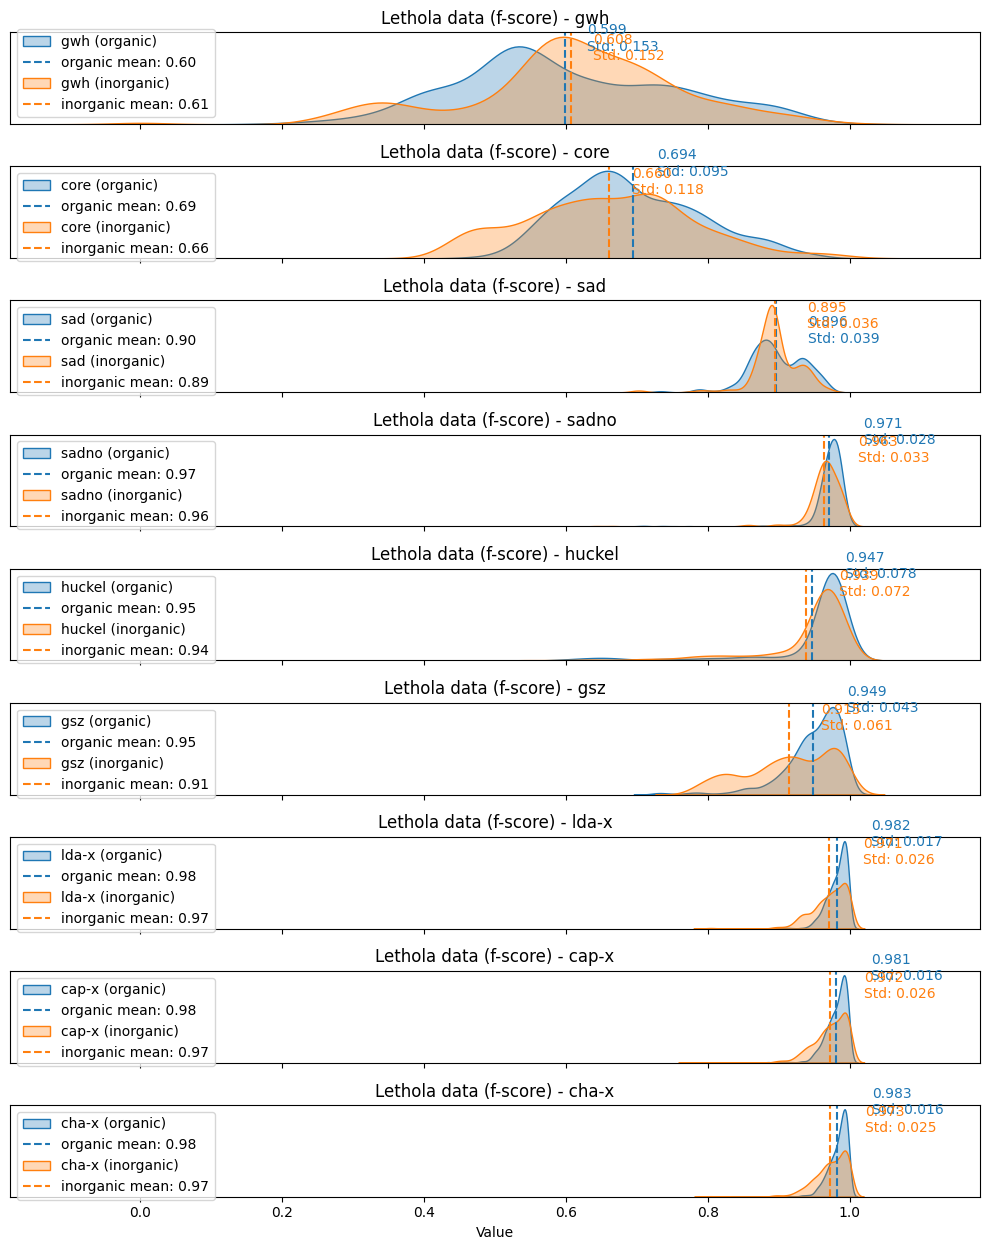

In [245]:
metrics = plot_stacked_density(lethola_data, guessing_methods_lethola, "organic", "Lethola data (f-score)", return_metrics=True)

## Functional Groups

In [246]:
lethola_data['functional_group'].value_counts()

functional_group
Unknown                             1448
Alkene                               288
Amine                                 80
Alkyne                                56
Nitrile                               48
Alcohol                               40
Ketone                                24
Ether                                 24
Aldehyde, Ketone                      16
Ester, Ether                          16
Alcohol, Carboxylic Acid, Ketone       8
Ether, Alkene                          8
Alcohol, Carboxylic Acid               8
Alcohol, Nitrile                       8
Name: count, dtype: int64

We can further group by functional groups and see if there are any patterns here. 

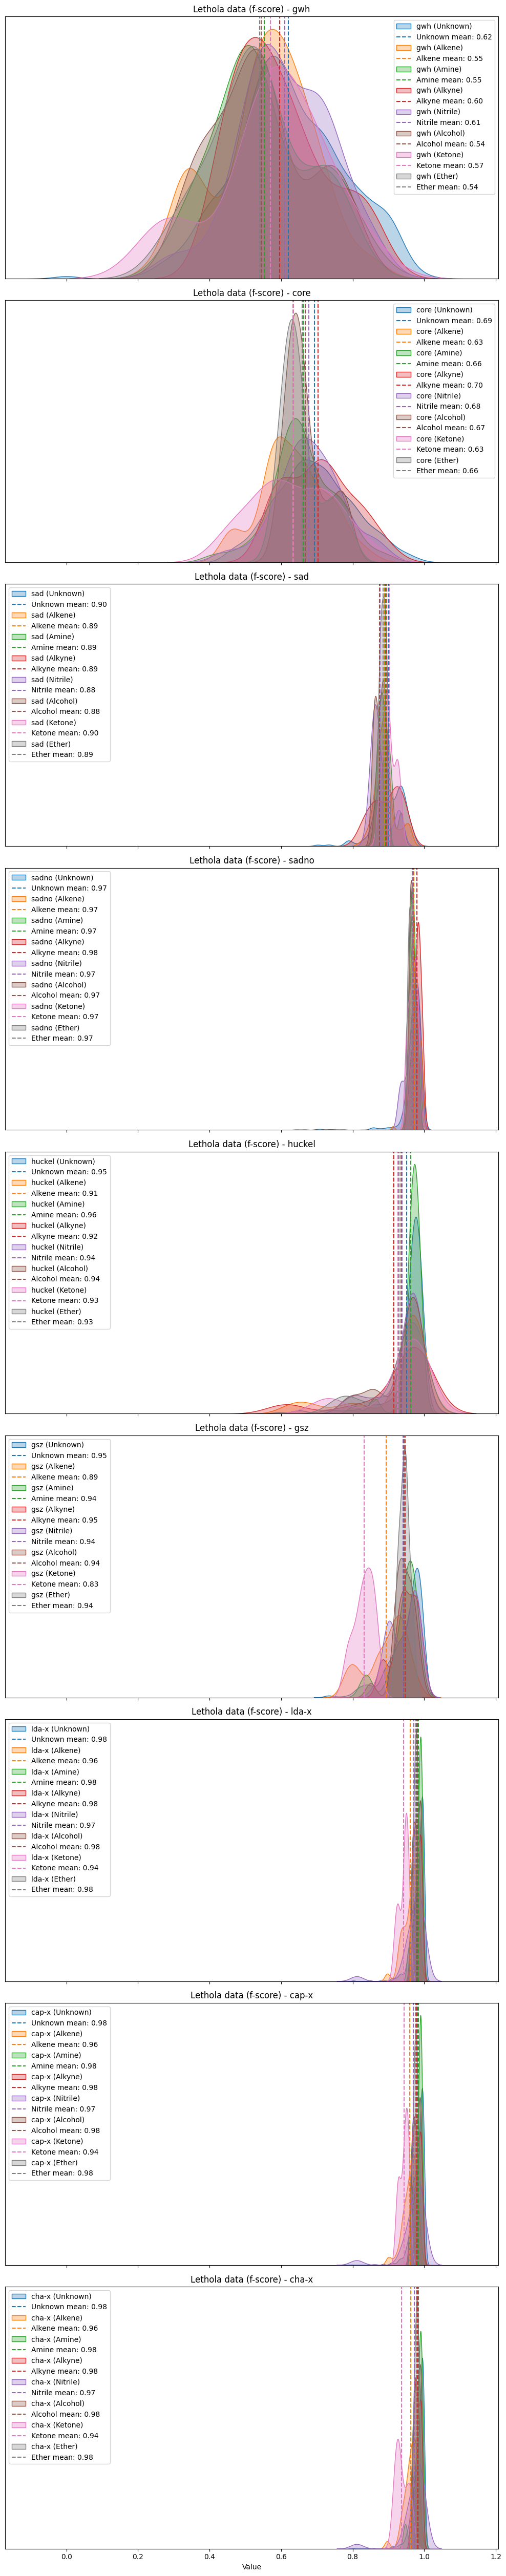

In [247]:
# Alkene                               288
# Amine                                 80
# Alkyne                                56
# Nitrile                               48
# Alcohol                               40
# Ketone                                24
# Ether       
functional_groups_to_use = ["Unknown", "Alkene", "Amine", "Alkyne", "Nitrile", "Alcohol", "Ketone", "Ether"]
# functional_groups_to_use = ["Alkene", "Amine", "Alkyne", "Nitrile", "Alcohol", "Ketone", "Ether"]
metrics = plot_stacked_density(lethola_data, guessing_methods_lethola, "functional_group", "Lethola data (f-score)", category_filter = functional_groups_to_use, return_metrics=True)

<!-- ## Psi 4 recalc... (at least for most molecules) -->

## Psi4 recalc for most molecules

functional_group
Unknown                             1448
Alkene                               288
Amine                                 80
Alkyne                                56
Nitrile                               48
Alcohol                               40
Ketone                                24
Ether                                 24
Aldehyde, Ketone                      16
Ester, Ether                          16
Alcohol, Carboxylic Acid, Ketone       8
Ether, Alkene                          8
Alcohol, Carboxylic Acid               8
Alcohol, Nitrile                       8
Name: count, dtype: int64


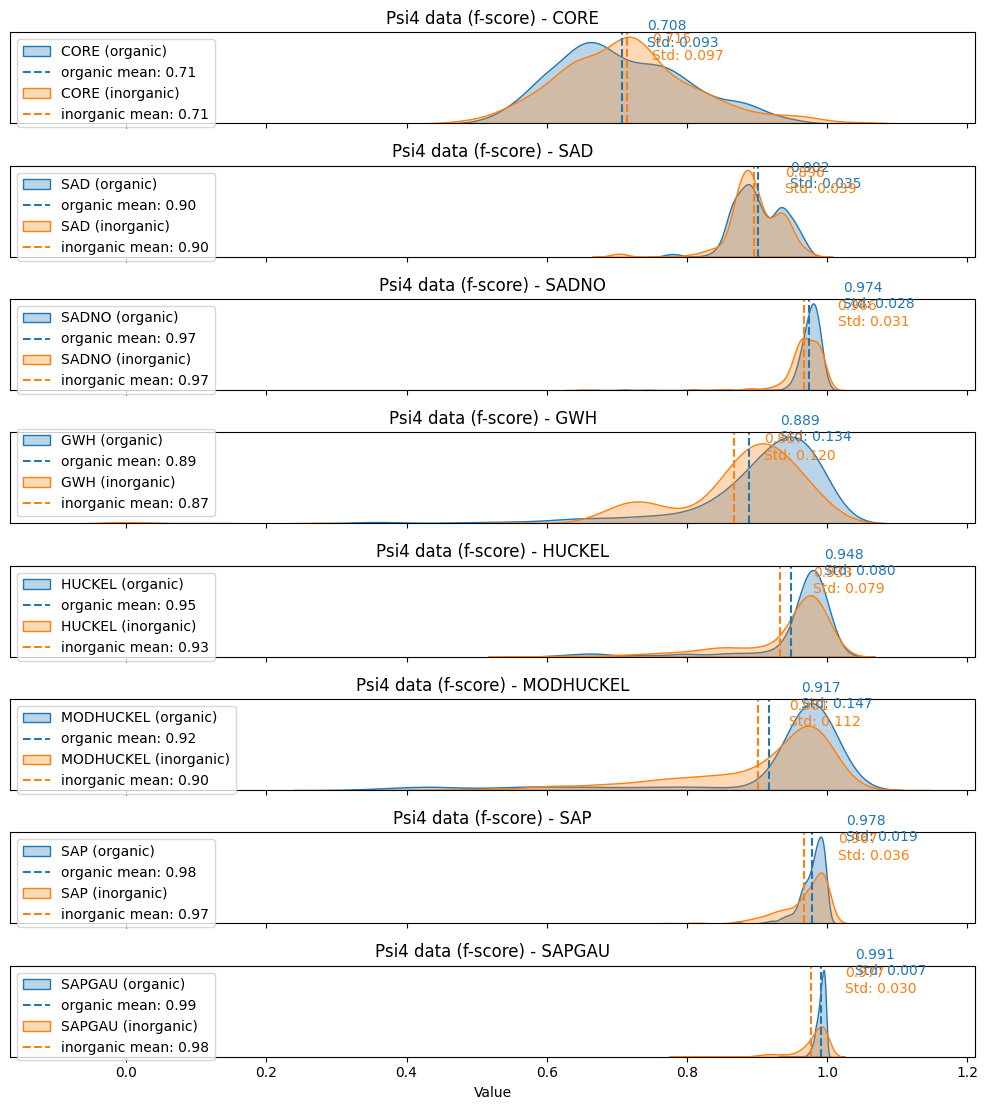

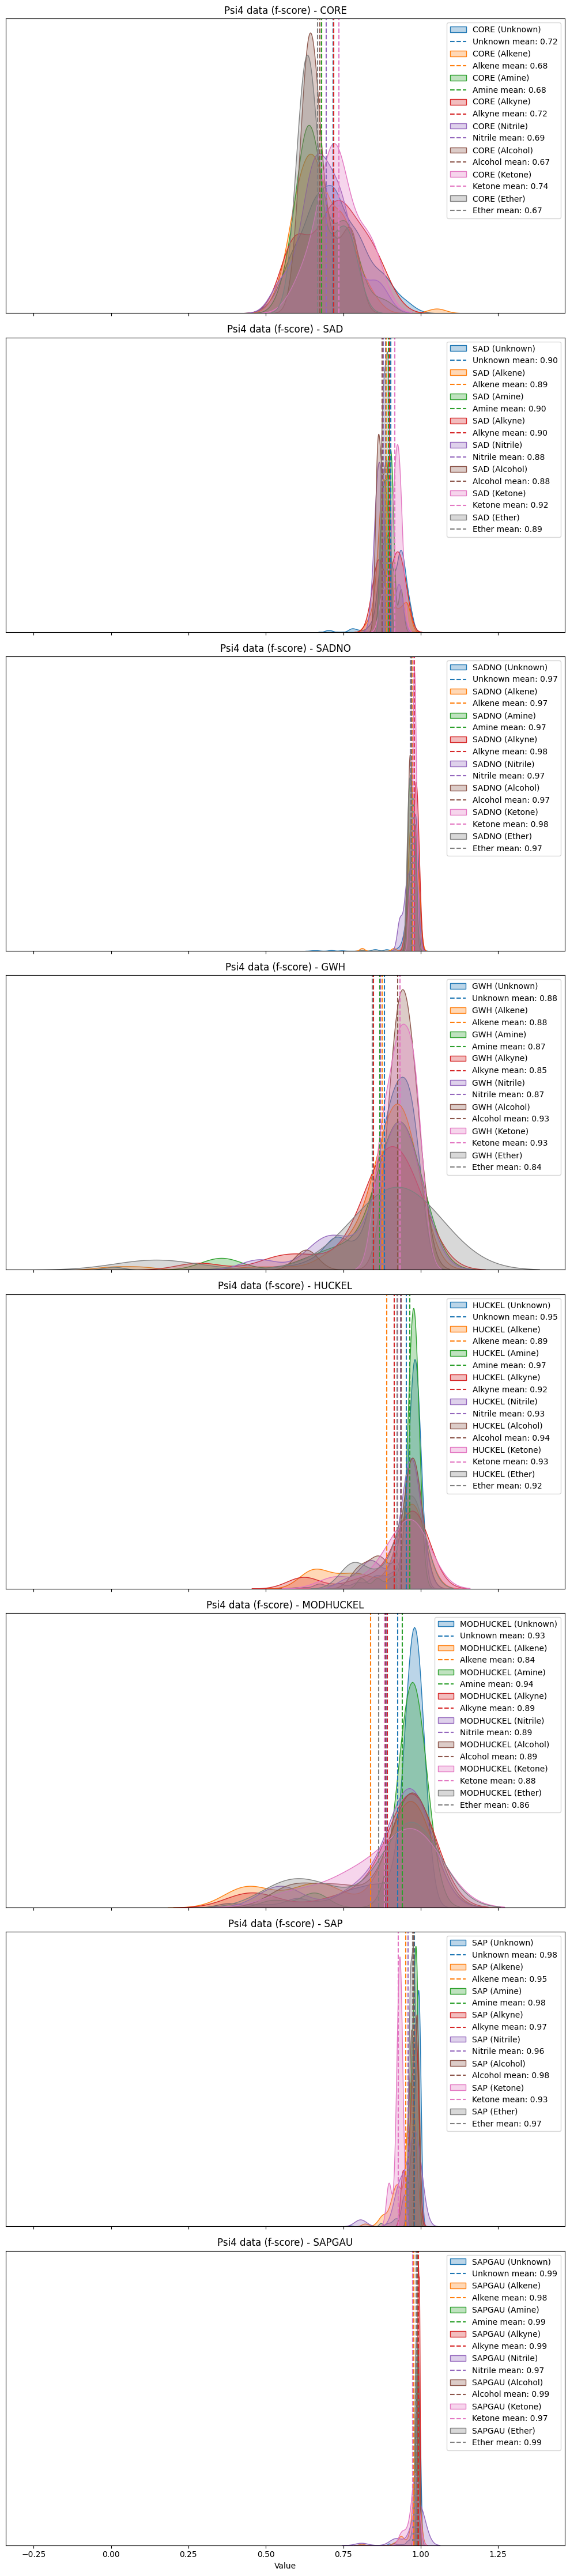

In [265]:
guessing_methods_psi4 = ["CORE", "SAD", "SADNO", "GWH", "HUCKEL", "MODHUCKEL", "SAP", "SAPGAU"]
vc = psi4_data["functional_group"].value_counts()
print(vc)
# plot_stacked_scatter(psi4_data, guessing_methods_psi4, "Psi4 data (f-score)")
metrics = plot_stacked_density(psi4_data, guessing_methods_psi4,"organic",  "Psi4 data (f-score)", return_metrics=True)
metrics = plot_stacked_density(psi4_data, guessing_methods_psi4,"functional_group", "Psi4 data (f-score)",category_filter= vc.index[:8].to_list(), return_metrics=True)

## PySCF recalc for many molecules